## Build a Decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioural data.

In [30]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Step 2: Load the dataset
df = pd.read_csv("bank-additional-full.csv", sep=';')  # Bank Marketing dataset uses ';' separator

print("Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
print("\nSample data:")
display(df.head())

Dataset loaded successfully!
Shape of dataset: (41188, 21)

Sample data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Step 3: Basic Data Exploration (EDA)
print("\nChecking for missing values:\n")
print(df.isnull().sum())

print("\nSummary statistics for numerical columns:\n")
display(df.describe())

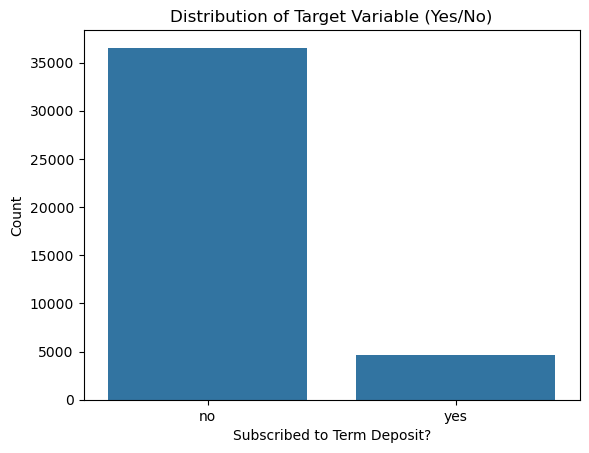

In [32]:
# Visualize target variable distribution
sns.countplot(x='y', data=df)
plt.title("Distribution of Target Variable (Yes/No)")
plt.xlabel("Subscribed to Term Deposit?")
plt.ylabel("Count")
plt.show()

In [24]:
# Step 4: Identify target and features
target_col = 'y'
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode the target variable (yes/no → 1/0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [7]:
# Step 5: Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)



Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numeric columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [11]:
# Step 6: Build preprocessing and model pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
], remainder='passthrough')

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=6, random_state=42))
])

In [13]:
# Step 7: Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (30891, 20)
Testing set size: (10297, 20)


In [15]:
# Step 8: Train the model
model.fit(X_train, y_train)
print("\nModel training completed!")


Model training completed!


In [17]:
# Step 9: Evaluate model performance
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Model Accuracy: 0.9177

Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.97      0.95      9137
         Yes       0.69      0.50      0.58      1160

    accuracy                           0.92     10297
   macro avg       0.81      0.73      0.77     10297
weighted avg       0.91      0.92      0.91     10297


Confusion Matrix:
 [[8875  262]
 [ 585  575]]


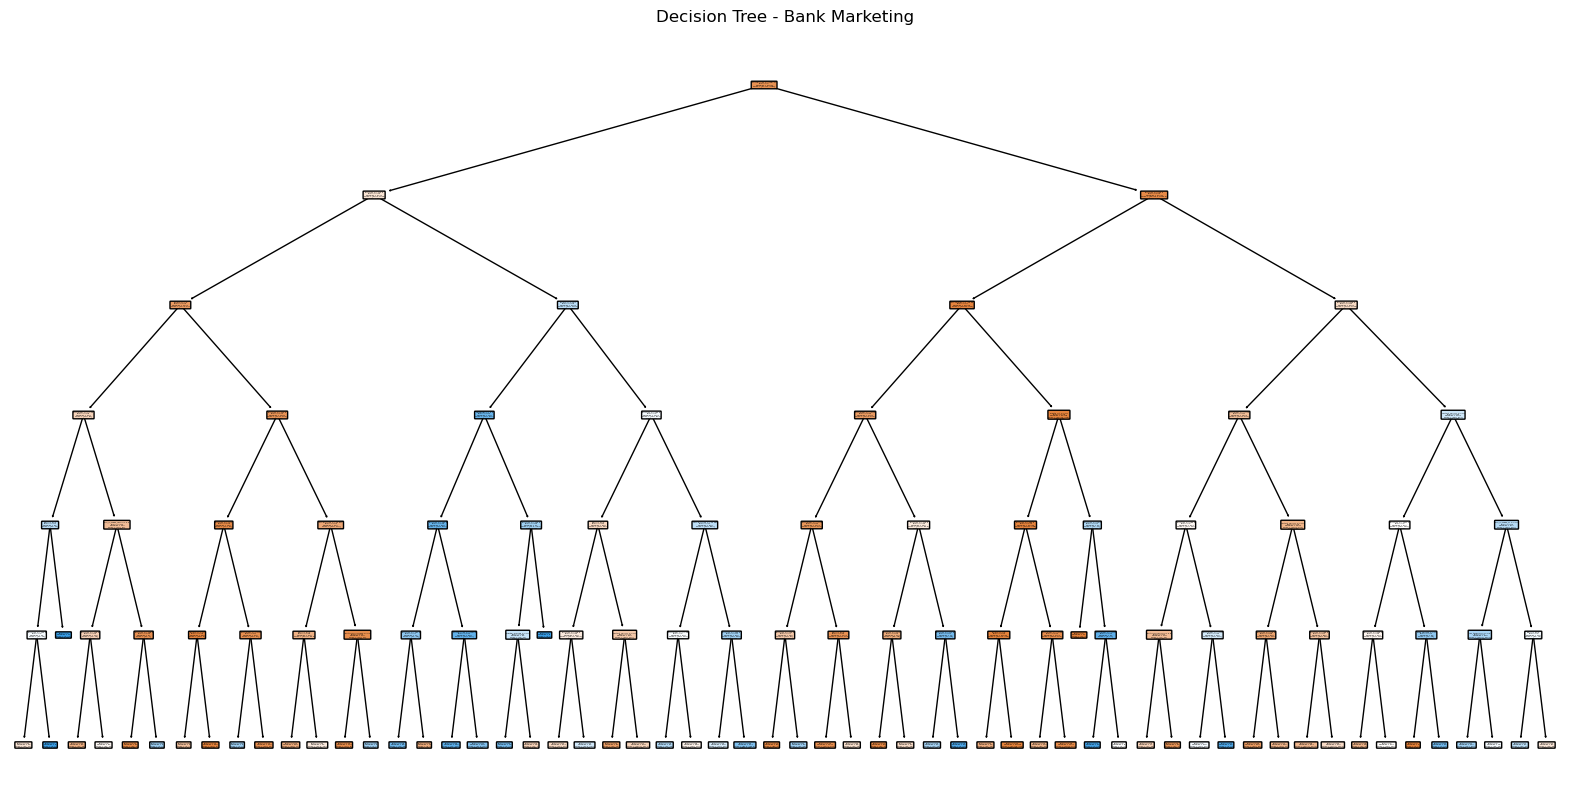

In [19]:
# Step 10: Visualize the Decision Tree
# Extract the trained tree
tree = model.named_steps['classifier']

# Get feature names after encoding
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
encoded_features = ohe.get_feature_names_out(categorical_cols)
feature_names = np.concatenate([encoded_features, numeric_cols])

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=feature_names, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree - Bank Marketing")
plt.show()

In [21]:
# Step 11: Display Decision Rules (Text Format)
tree_rules = export_text(tree, feature_names=list(feature_names), max_depth=5)
print("\nSample Decision Rules (truncated to depth 5):\n")
print(tree_rules[:2000])


Sample Decision Rules (truncated to depth 5):

|--- nr.employed <= 5087.65
|   |--- duration <= 172.50
|   |   |--- pdays <= 7.50
|   |   |   |--- euribor3m <= 0.72
|   |   |   |   |--- age <= 59.50
|   |   |   |   |   |--- duration <= 162.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- duration >  162.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  59.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- euribor3m >  0.72
|   |   |   |   |--- day_of_week_mon <= 0.50
|   |   |   |   |   |--- duration <= 125.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- duration >  125.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- day_of_week_mon >  0.50
|   |   |   |   |   |--- duration <= 158.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- duration >  158.50
|   |   |   |   |   |   |--- class: 1
|   |   |--- pdays >  7.50
|   |   |   |--- duration <= 124.50
|   |   |   |   |--- duration <= 77.50
|   |   |   |

In [34]:
# Step 12: Conclusion
print("\n📊 CONCLUSION:")
print(f"The Decision Tree Classifier achieved an accuracy of {accuracy:.2%}.")
print("It helps identify which clients are more likely to subscribe to a term deposit.")
print("Feature importance and tree visualization show which attributes (like age, job, duration, etc.) strongly influence decisions.")



📊 CONCLUSION:
The Decision Tree Classifier achieved an accuracy of 91.77%.
It helps identify which clients are more likely to subscribe to a term deposit.
Feature importance and tree visualization show which attributes (like age, job, duration, etc.) strongly influence decisions.
